In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
imagem = cv2.imread('imagem/barcelona.jpg')
#imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

In [19]:
def display(imagem):
    figura = plt.figure(figsize=(10,8))
    ax = figura.add_subplot(111)
    nova_imagem = cv2.cvtColor(imagem,cv2.COLOR_BGR2RGB)
    ax.imshow(nova_imagem)
    plt.show()

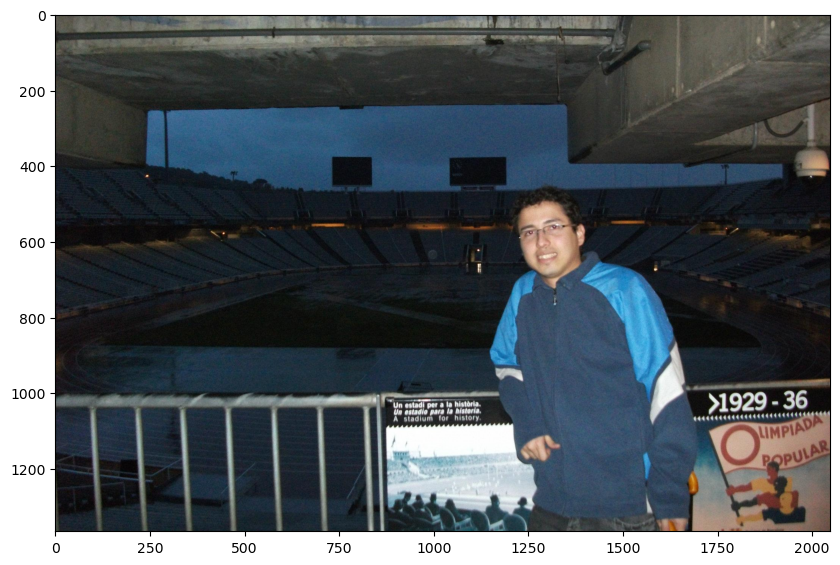

In [21]:
display(imagem)

In [22]:
face_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')

In [25]:
def detecta_face(imagem):
    imagem_face = imagem.copy()

    retangulo_face = face_cascade.detectMultiScale(imagem_face, scaleFactor = 1.2, minNeighbors = 5)

    for (x,y,w,h) in retangulo_face:
        cv2.rectangle(imagem_face,(x,y),(x+w,y+h), (0,0,255),10)
    return imagem_face

In [27]:
resultado = detecta_face(imagem)

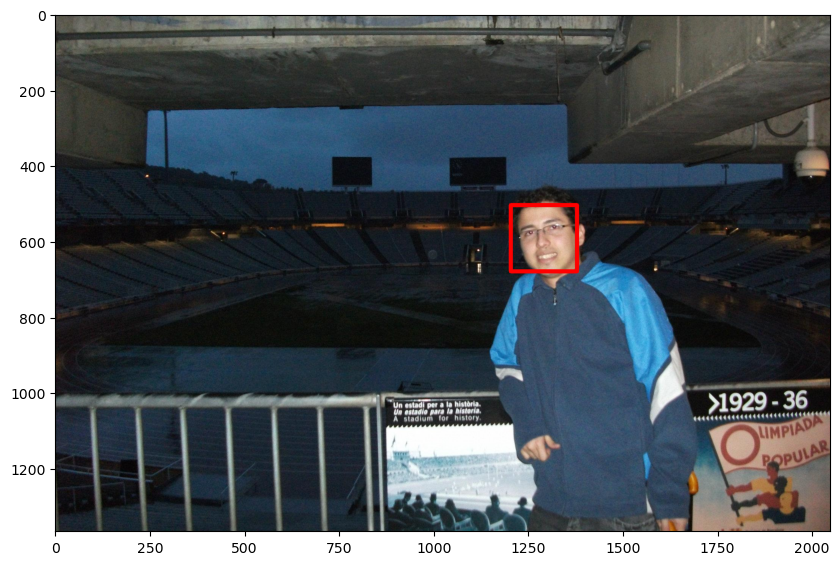

In [28]:
display(resultado)

In [31]:
def detecta_e_borra_face(imagem):
    imagem_face = imagem.copy()
    
    # Detectando as faces na imagem
    retangulo_face = face_cascade.detectMultiScale(imagem_face, scaleFactor=1.2, minNeighbors=5)
    
    print(len(retangulo_face))
    
    if len(retangulo_face) == 0:
        print("Nenhuma face detectada.")
        return imagem_face  # Retorne a imagem original se nenhuma face for detectada

    # Para cada face detectada, borramos a área da face
    for (x, y, w, h) in retangulo_face:
        # Recortando a região da face
        roi = imagem_face[y:y+h, x:x+w]
             
        # Aplicando o desfoque na região da face
        roi_borrada = cv2.medianBlur(roi, 13)

        # Substituindo a face original pela face borrada na imagem
        imagem_face[y:y+h, x:x+w] = roi_borrada
        
    return imagem_face

In [33]:
resultado = detecta_e_borra_face(imagem)

1


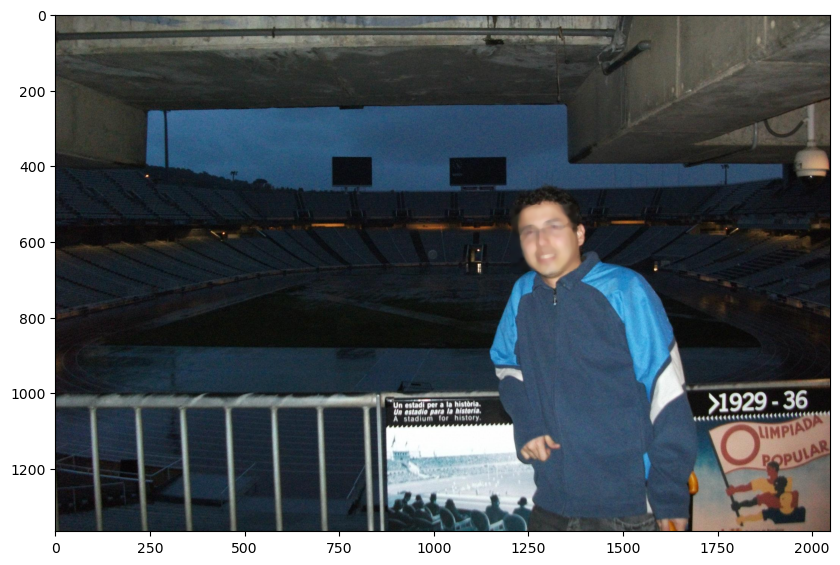

In [35]:
display(resultado)